# chap20 전이학습을 통한 딥러닝의 성능 극대화

## 1. 소규모 데이터셋이로 만드는 강력한 학습모델

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 기존의 이미지의 갯수를 늘리는 작업 : 데이터 전처리
train_datagen=ImageDataGenerator(rescale=1./255,   # 정규화
                   horizontal_flip=True, # 수평으로 뒤집기
                   width_shift_range=0.1, # 수평이동
                   height_shift_range=0.1, # 수직이동
                   fill_mode='nearest')  # 빈 공간 채우는 방법
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator= train_datagen.flow_from_directory('./data/data/chap20-data/train',   # 학습셋이 있는 폴더의 위치
                                                target_size=(150,150), batch_size=5, class_mode='binary')

test_generator= test_datagen.flow_from_directory('./data/data/chap20-data/test',   # 학습셋이 있는 폴더의 위치
                                                target_size=(150,150), batch_size=5, class_mode='binary')

Found 160 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


In [3]:
# CNN 모델 적용
model = Sequential()
model.add(Conv2D(32, kernel_size=3, input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [4]:
# 모델 옵션 설정
model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0002), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [5]:
history=model.fit(train_generator, epochs=100, validation_data=test_generator, validation_steps=10, callbacks=[early_stopping])

Epoch 1/100
32/32 [==============================] - 7s 175ms/step - loss: 0.6943 - accuracy: 0.4875 - val_loss: 0.6893 - val_accuracy: 0.8200
Epoch 2/100
32/32 [==============================] - 3s 91ms/step - loss: 0.6908 - accuracy: 0.5500 - val_loss: 0.6915 - val_accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 3s 90ms/step - loss: 0.6978 - accuracy: 0.4563 - val_loss: 0.6850 - val_accuracy: 0.7000
Epoch 4/100
32/32 [==============================] - 3s 87ms/step - loss: 0.6866 - accuracy: 0.5312 - val_loss: 0.6908 - val_accuracy: 0.4000
Epoch 5/100
32/32 [==============================] - 3s 87ms/step - loss: 0.6891 - accuracy: 0.5250 - val_loss: 0.6609 - val_accuracy: 0.8600
Epoch 6/100
32/32 [==============================] - 3s 84ms/step - loss: 0.6824 - accuracy: 0.6125 - val_loss: 0.6808 - val_accuracy: 0.4600
Epoch 7/100
32/32 [==============================] - 3s 84ms/step - loss: 0.6670 - accuracy: 0.6438 - val_loss: 0.6229 - val_accuracy: 0.7400
Epoch

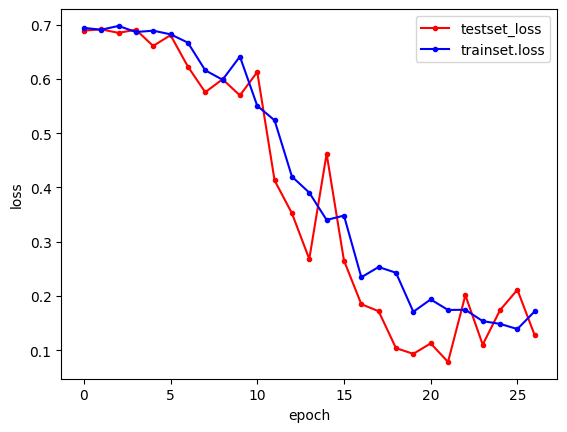

In [6]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len= np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='trainset.loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()